# Dataverse - Bean and Brew - Sustainable Strategy

#### Load useful packages

In [1]:
library(tidyverse)
#library(tidymodels)
#library(tidyclust)
library(repr)
library(GGally)
options(repr.matrix.max.rows = 6)
#source("cleanup.R")

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.1.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


#### Load datasets

In [2]:
items <- read_csv("items.csv")
items

Warning message:
“One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)”
Rows: 17 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): item_name, item_type, drink_temperature, drink_type
dbl (2): price, production_cost

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


item_name,price,production_cost,item_type,drink_temperature,drink_type
<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>
Espresso,3.0,0.8,Drink,Hot,Coffee
Americano,3.5,1.0,Drink,Hot,Coffee
Latte,4.5,1.2,Drink,Hot,Coffee
⋮,⋮,⋮,⋮,⋮,⋮
Reusable Coffee Cup,15,6,Merchandise,N/A,NA
Tote Bag,12,4,Merchandise,N/A,NA
Coffee Beans (1 lb),18,8,Merchandise,N/A,NA


In [3]:
sales <- read_csv("sales.csv")
sales

Rows: 32605 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (3): item_name, transaction_type, own_cup
dbl  (1): customer_id
lgl  (1): surcharge
date (1): date
time (1): time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


date,time,item_name,transaction_type,own_cup,surcharge,customer_id
<date>,<time>,<chr>,<chr>,<chr>,<lgl>,<dbl>
2022-01-01,07:03:30,Cold Brew,Takeout,True,FALSE,26946
2022-01-01,07:30:58,Iced Coffee,Takeout,True,FALSE,24356
2022-01-01,08:32:23,Iced Latte,Takeout,False,FALSE,3760
⋮,⋮,⋮,⋮,⋮,⋮,⋮
2024-12-31,14:36:31,Chai Latte,Dine-in,True,FALSE,15227
2024-12-31,14:57:19,Cappuccino,Takeout,True,FALSE,21314
2024-12-31,15:30:12,Espresso,Dine-in,False,FALSE,11063


### Join items and sales by item_name

In [4]:
coffee <- inner_join(items,sales)
coffee

Joining with `by = join_by(item_name)`


item_name,price,production_cost,item_type,drink_temperature,drink_type,date,time,transaction_type,own_cup,surcharge,customer_id
<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<date>,<time>,<chr>,<chr>,<lgl>,<dbl>
Espresso,3,0.8,Drink,Hot,Coffee,2022-01-02,10:43:09,Takeout,False,FALSE,18500
Espresso,3,0.8,Drink,Hot,Coffee,2022-01-02,15:26:48,Takeout,True,FALSE,11609
Espresso,3,0.8,Drink,Hot,Coffee,2022-01-03,07:18:28,Dine-in,False,FALSE,10437
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Coffee Beans (1 lb),18,8,Merchandise,N/A,NA,2024-12-24,07:25:20,Dine-in,N/A,FALSE,16702
Coffee Beans (1 lb),18,8,Merchandise,N/A,NA,2024-12-26,13:02:19,Takeout,N/A,FALSE,12418
Coffee Beans (1 lb),18,8,Merchandise,N/A,NA,2024-12-29,13:38:39,Dine-in,N/A,FALSE,29715


### Separate the dataset *coffee* into two datasets (*merch* and *coffee_only*)

In [5]:
merch <- filter(coffee, item_type == "Merchandise")
merch

item_name,price,production_cost,item_type,drink_temperature,drink_type,date,time,transaction_type,own_cup,surcharge,customer_id
<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<date>,<time>,<chr>,<chr>,<lgl>,<dbl>
Reusable Coffee Cup,15,6,Merchandise,N/A,NA,2022-01-11,07:19:12,Takeout,N/A,FALSE,24356
Reusable Coffee Cup,15,6,Merchandise,N/A,NA,2022-01-12,09:52:37,Takeout,N/A,FALSE,14571
Reusable Coffee Cup,15,6,Merchandise,N/A,NA,2022-01-13,07:11:59,Dine-in,N/A,FALSE,24899
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Coffee Beans (1 lb),18,8,Merchandise,N/A,NA,2024-12-24,07:25:20,Dine-in,N/A,FALSE,16702
Coffee Beans (1 lb),18,8,Merchandise,N/A,NA,2024-12-26,13:02:19,Takeout,N/A,FALSE,12418
Coffee Beans (1 lb),18,8,Merchandise,N/A,NA,2024-12-29,13:38:39,Dine-in,N/A,FALSE,29715


### Change the data type for easier future use

In [6]:
coffee_only <- coffee |> 
  filter(item_type != "Merchandise") |>
  mutate(
    drink_temperature = as_factor(drink_temperature),
    drink_type        = as_factor(drink_type),
    transaction_type  = as_factor(transaction_type),
    own_cup           = as.logical(own_cup)
  )
coffee_only

item_name,price,production_cost,item_type,drink_temperature,drink_type,date,time,transaction_type,own_cup,surcharge,customer_id
<chr>,<dbl>,<dbl>,<chr>,<fct>,<fct>,<date>,<time>,<fct>,<lgl>,<lgl>,<dbl>
Espresso,3,0.8,Drink,Hot,Coffee,2022-01-02,10:43:09,Takeout,FALSE,FALSE,18500
Espresso,3,0.8,Drink,Hot,Coffee,2022-01-02,15:26:48,Takeout,TRUE,FALSE,11609
Espresso,3,0.8,Drink,Hot,Coffee,2022-01-03,07:18:28,Dine-in,FALSE,FALSE,10437
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Hot Chocolate,4.25,1.1,Drink,Hot,Other,2024-12-29,11:37:28,Dine-in,FALSE,FALSE,25413
Hot Chocolate,4.25,1.1,Drink,Hot,Other,2024-12-30,07:47:35,Takeout,TRUE,FALSE,11586
Hot Chocolate,4.25,1.1,Drink,Hot,Other,2024-12-31,13:15:02,Takeout,TRUE,FALSE,11609


### Explore the relationship between temperature of the drink and the use of customer-brought reusable cups

#### Do customers tend to bring their own cups for hot drinks or cold drinks? 

In [7]:
coffee_drink_temperature <- coffee_only|> 
  group_by(drink_temperature) |> 
  summarise(brought_cup = sum(own_cup == TRUE),not_brought_cups = sum(own_cup == FALSE ),proportion = mean(own_cup == TRUE), proportion_not_own_cup = mean(own_cup == FALSE))
coffee_drink_temperature

drink_temperature,brought_cup,not_brought_cups,proportion,proportion_not_own_cup
<fct>,<int>,<int>,<dbl>,<dbl>
Hot,10509,10109,0.5097003,0.4902997
Cold,2758,7085,0.2801991,0.7198009


The data suggests that hot drinks are much more likely to be ordered using a reusable cup than cold drinks. The proportion of customers bringing their own cup for hot beverages is around 51%, whereas for cold beverages it drops to about 28%. This pattern can be interpreted in several realistic ways:
###### Practicality and Habit
- Customers tend to associate reusable cups (e.g., travel mugs, thermoses) with hot drinks like coffee or tea. Many people already own insulated hot drink tumblers and routinely carry them, especially commuters. Therefore, they naturally use them when purchasing hot drinks.
- Cold beverages, however, are more often consumed on the go without preplanning, meaning customers are less likely to bring a cup specifically for a cold drink.
###### Type of Container Used
- Reusable hot drink mugs are widely available, standardized, and easy for shops to fill.
- Reusable containers for cold drinks (e.g., clear tumblers for iced drinks) are less commonly owned, and many customers may not think of bringing one.
- Some coffee shops also have stricter guidelines for filling customer-provided containers for iced/blended drinks, reducing incentive.
###### Seasonal/Comfort Motivation
- Hot drinks are often purchased during colder weather, when customers already carry bags, backpacks, or jackets—making it easy to carry a reusable cup.
- Cold drinks are often spontaneous purchases in warm weather (e.g., “I’m hot, I’ll grab an iced coffee”), so people may not have brought a reusable container with them.

###### Conclusion
Overall, the data indicates that hot drink customers engage in sustainable behavior more consistently, likely due to established habits, availability of suitable reusable containers, and the practical advantages of insulated travel mugs. Cold drink consumers show much lower reusability, suggesting that encouraging reusable cold drink tumblers (or offering incentives) could significantly reduce waste in that category.

### Was there a long-term negative effect on the number of customers at Bean & Brew due to the construction?

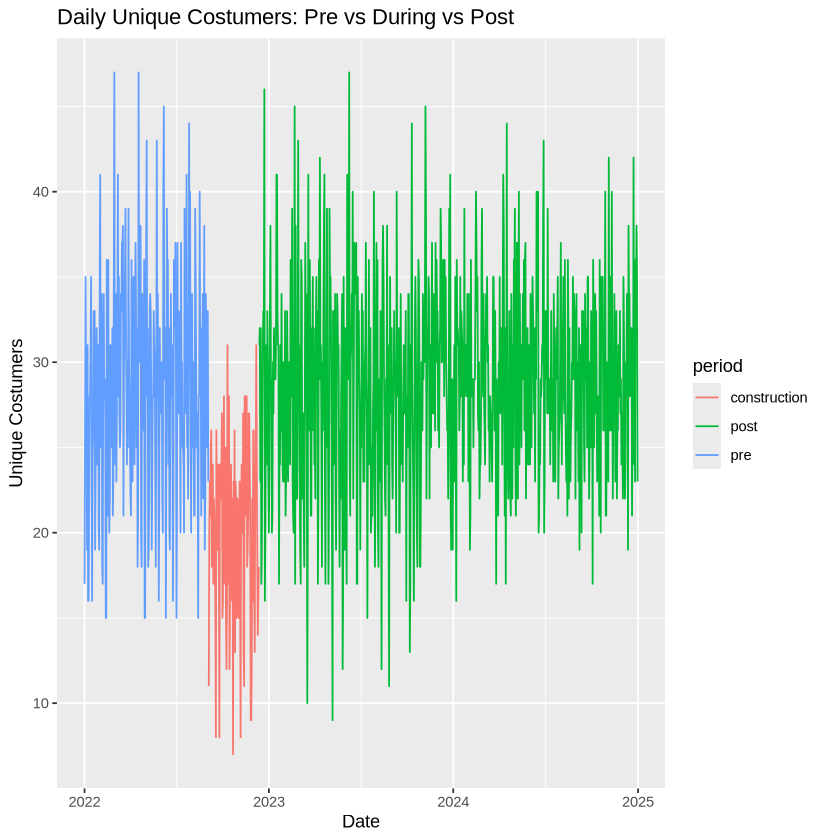

In [16]:
construction <- coffee |>
mutate(
    date=ymd(date),
    period=case_when(
           date<ymd("2022-09-04")~"pre",
           date>=ymd("2022-09-04")&date<=ymd("2022-12-12")~"construction",
           TRUE~"post"))

daily_customers <- construction |>
group_by(date, period) |>
summarise(unique_customers=n_distinct(customer_id), .groups="drop")

avg_customers <- daily_customers |>
group_by(period) |>
summarise(avg_daily_customer=mean(unique_customers))

ggplot(daily_customers, aes(date, unique_customers, color=period))+
geom_line()+
labs(title="Daily Unique Costumers: Pre vs During vs Post",
    x="Date",
    y="Unique Costumers")

The graph indicates a short-term decrease in the number of customers during the time of construction. In the long-term the number of customers was not affected. 

In [9]:
coffee_trans_type <- coffee_only|> 
  group_by(transaction_type) |> 
  summarize(brought_cup = sum(own_cup == TRUE))
coffee_trans_type

transaction_type,brought_cup
<fct>,<int>
Takeout,8973
Dine-in,4294


Transaction type also affects reusable cup behaviour. Takeout customers are much more likely to bring their own cups compared to dine-in customers, likely because people getting beverages to-go already carry travel mugs as part of their routine. In contrast, dine-in customers typically expect the café to provide a cup, so they have less reason to bring their own.

In [10]:
coffee_drink_type <- coffee_only|> 
  group_by(drink_type,drink_temperature) |> 
  summarise(brought_cup = sum(own_cup == TRUE),not_brought_cups = sum(own_cup == FALSE ),proportion = mean(own_cup == TRUE))
coffee_drink_type

`summarise()` has grouped output by 'drink_type'. You can override using the
`.groups` argument.


drink_type,drink_temperature,brought_cup,not_brought_cups,proportion
<fct>,<fct>,<int>,<int>,<dbl>
Coffee,Hot,6068,5985,0.5034431
Coffee,Cold,1846,4718,0.2812310
Tea,Hot,3536,3255,0.5206891
Tea,Cold,912,2367,0.2781336
Other,Hot,905,869,0.5101466


In [11]:
# explore how morning/affternoon coffee customers respond to policy differently
coffee_only_time_h <- as.numeric(coffee_only$time)/3600
noon <- as.difftime("12:00:00", format="%H:%M:%S")|>
  as.numeric(units = "hours")
coffee_only_time <- coffee_only |>
  mutate(time = coffee_only_time_h)|>
  mutate(day_type = ifelse(wday(date) %in% c(1, 7),   # 1 = Sunday, 7 = Saturday
                           "Weekend",
                           "Weekday"))|>
  mutate(day_time = if_else(time < noon, "Morning", "Afternoon"))|>
  mutate(rebrand = if_else(date < as.Date("2023-11-01"), FALSE, TRUE))

In [19]:
coffee_only_time_own_week <- coffee_only_time|>
                            group_by(day_type, day_time, rebrand)|>
                            summarize(prop_own_cup = mean(own_cup))

coffee_only_time_own_week_table <- coffee_only_time_own_week %>%
  pivot_wider(
    names_from = c(day_time, rebrand), 
    values_from = prop_own_cup
  )
coffee_table_wide

`summarise()` has grouped output by 'day_type', 'day_time'. You can override
using the `.groups` argument.


day_type,Afternoon_FALSE,Afternoon_TRUE,Morning_FALSE,Morning_TRUE
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Weekday,0.4018588,0.4909651,0.4004786,0.4803224
Weekend,0.4074703,0.4916388,0.3900952,0.4854192


In [13]:
prop_own_transaction_type <- coffee_only_time|>
                            group_by(transaction_type, day_time, rebrand)|>
  summarize(prop_own_cup_transaction_type = mean(own_cup))
print(prop_own_transaction_type)

`summarise()` has grouped output by 'transaction_type', 'day_time'. You can
override using the `.groups` argument.


# A tibble: 8 × 4
# Groups:   transaction_type, day_time [4]
  transaction_type day_time  rebrand prop_own_cup_transaction_type
  <fct>            <chr>     <lgl>                           <dbl>
1 Takeout          Afternoon FALSE                           0.402
2 Takeout          Afternoon TRUE                            0.546
3 Takeout          Morning   FALSE                           0.402
4 Takeout          Morning   TRUE                            0.523
5 Dine-in          Afternoon FALSE                           0.406
6 Dine-in          Afternoon TRUE                            0.41 
7 Dine-in          Morning   FALSE                           0.390
8 Dine-in          Morning   TRUE                            0.422


In [14]:
prop_transaction_type <- coffee_only_time|>
                            group_by(rebrand)|>
  summarize(prop_dine_in = sum(transaction_type == "Dine-in") / n())
print(prop_transaction_type)

# A tibble: 2 × 2
  rebrand prop_dine_in
  <lgl>          <dbl>
1 FALSE          0.307
2 TRUE           0.407


##### Explanation of how the policy change affects reusability of cups
The data shows that the rebrand and cup policy does improve the reusability of cups. The proportion of reusable cup usage increased both morning and afternoon after the policy introduced. For both morning and afternoon, the use of reusable cups increased significantly for takeout orders. The reusable cup usge changed only slightly for dine-in orders, however, the proportion of dine-in order increased. These findings suggest that:
##### The surcharge could be the main contributor to the cup reusability 
The surcharge was applied to the takeout orders only, which could have motivated people to bring their own cups to avoid it.
##### The rebrand was also in effect
The interior change likely encouraged more customers to dine-in. Moreover, even though ceramic cups are provided, more people were bringing their own cups to the cafe. This could indicate that there was a trend in customers to use their own cups.
##### There is no big difference in customer behaviour in the morning compared to in the afternoon, however, in weekend morning the response to the policy is most significant as the proportion of own-reusable-cup usage increased from 39% to 48.5%, which is 9.5%!

In [15]:
# what proportion of types of merches people buy/which is most profitable
tot_profit_cafe = coffee
merch <- merch |>
  group_by(item_name) %>%
  summarise(count = n()) %>%
  mutate(proportion = count / sum(count))|>
  left_join(items, by = "item_name")|>
  mutate(profit_per = price-production_cost)|>
  mutate(total_profit = count * profit_per)|>
  select(-drink_temperature, -drink_type, -item_type)
merch


item_name,count,proportion,price,production_cost,profit_per,total_profit
<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Coffee Beans (1 lb),738,0.3442164,18,8,10,7380
Reusable Coffee Cup,728,0.3395522,15,6,9,6552
Tote Bag,678,0.3162313,12,4,8,5424


[1] "Espresso"          "Americano"         "Latte"            
 [4] "Cappuccino"        "Flat White"        "Mocha"            
 [7] "Iced Coffee"       "Cold Brew"         "Iced Latte"       
[10] "Iced Matcha Latte" "Matcha Latte"      "Chai Latte"       
[13] "Green Tea"         "Hot Chocolate"

item_name,total,brought_cup,proportion_brought
<chr>,<int>,<int>,<dbl>
Iced Latte,2367,651,0.2750317
Iced Matcha Latte,3279,912,0.2781336
Iced Coffee,2695,761,0.2823748
⋮,⋮,⋮,⋮
Latte,2439,1247,0.5112751
Green Tea,2639,1403,0.5316408
Matcha Latte,1790,962,0.5374302


item_name,total_sales,total_cost
<chr>,<dbl>,<dbl>
Iced Matcha Latte,17214.75,5246.4
Chai Latte,11573.80,3543.0
Mocha,11040.00,3220.0
⋮,⋮,⋮
Cold Brew,7134.5,2027.7
Flat White,6089.5,1602.5
Espresso,4383.0,1168.8


total_sales
<dbl>
46017.45


total_sales
<dbl>
0


total_discounted_sales
<dbl>
41095.95


item_name,price,production_cost,item_type,drink_temperature,drink_type,date,time,transaction_type,own_cup,surcharge,customer_id,points_earned
<chr>,<dbl>,<dbl>,<chr>,<fct>,<fct>,<date>,<time>,<chr>,<lgl>,<lgl>,<dbl>,<dbl>
Espresso,3,0.8,Drink,Hot,Coffee,2022-01-02,10:43:09,Takeout,FALSE,FALSE,18500,0
Espresso,3,0.8,Drink,Hot,Coffee,2022-01-02,15:26:48,Takeout,TRUE,FALSE,11609,0
Espresso,3,0.8,Drink,Hot,Coffee,2022-01-03,07:18:28,Dine-in,FALSE,FALSE,10437,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Hot Chocolate,4.25,1.1,Drink,Hot,Other,2024-12-29,11:37:28,Dine-in,FALSE,FALSE,25413,0
Hot Chocolate,4.25,1.1,Drink,Hot,Other,2024-12-30,07:47:35,Takeout,TRUE,FALSE,11586,0
Hot Chocolate,4.25,1.1,Drink,Hot,Other,2024-12-31,13:15:02,Takeout,TRUE,FALSE,11609,0


total_points
<dbl>
1122200


`summarise()` has grouped output by 'item_name'. You can override using the
`.groups` argument.


item_name,own_cup,points_given
<chr>,<lgl>,<dbl>
Americano,FALSE,0
Americano,TRUE,0
Cappuccino,FALSE,0
⋮,⋮,⋮
Matcha Latte,TRUE,0
Mocha,FALSE,0
Mocha,TRUE,0


drink_type,total,brought_cup,proportion_brought
<fct>,<int>,<int>,<dbl>
Coffee,18617,7914,0.4250953
Tea,10070,4448,0.4417080
Other,1774,905,0.5101466


drink_type,total_sales
<fct>,<dbl>
Coffee,78923.45
Tea,45839.15
Other,7539.50


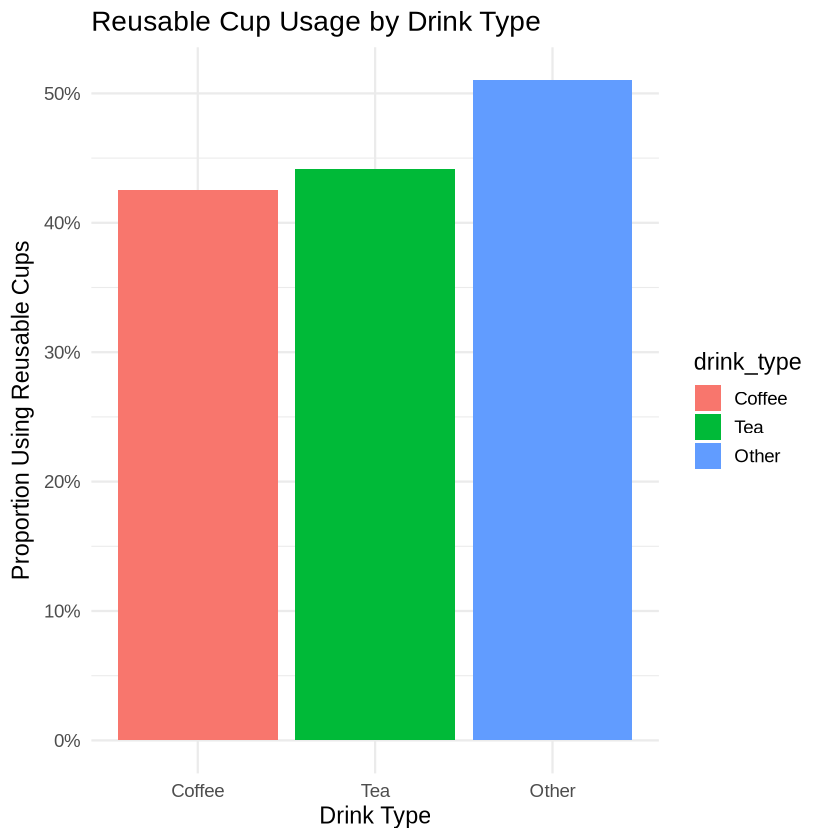

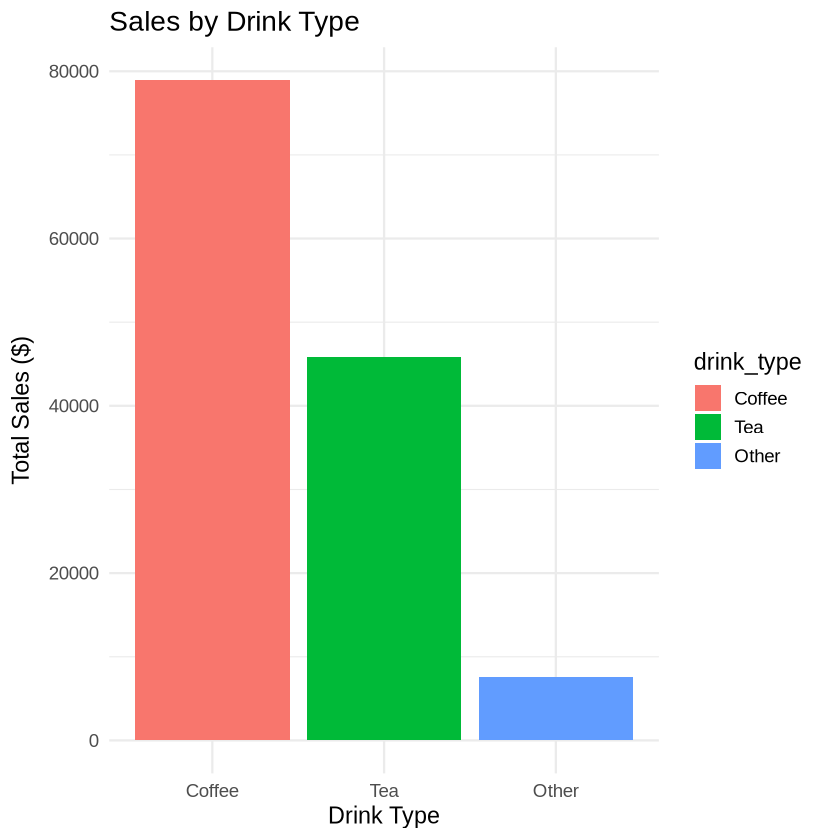

In [77]:
coffee_only <- coffee |>
  filter(item_type != "Merchandise") |> 
  mutate(
    # Remove weird quotes and clean names
    item_name = str_replace_all(item_name, "''", ""),
    item_name = str_replace_all(item_name, "'", ""),
    item_name = str_trim(item_name),

    # Standardize factors
    drink_type = as_factor(drink_type),
    drink_temperature = as_factor(drink_temperature),

    # Ensure logical
    own_cup = as.logical(own_cup)
  )

unique(coffee_only$item_name)


# ======================================================
# 2. REUSE RATE BY ITEM
# ======================================================

reuse_by_item <- coffee_only |> 
  group_by(item_name) |> 
  summarise(
    total = n(),
    brought_cup = sum(own_cup),
    proportion_brought = mean(own_cup)
  ) |> 
  arrange(proportion_brought)

reuse_by_item


# ======================================================
# 3. SALES + COST BY ITEM
# ======================================================

sales_cost_item <- coffee_only |> 
  group_by(item_name) |> 
  summarise(
    total_sales = sum(price),
    total_cost = sum(production_cost)
  ) |> 
  arrange(desc(total_sales))

sales_cost_item


# ======================================================
# 4. COLD & HOT ITEMS DATASETS
# ======================================================

cold_list <- c("Iced Matcha Latte", "Iced Latte", "Cold Brew", "Iced Coffee")

cold_items_df <- coffee_only |> 
  filter(item_name %in% cold_list)

hot_items_df <- coffee_only |> 
  filter(!(item_name %in% cold_list)) |> 
  filter(drink_type == "Hot")  # Only hot drinks

# Sales
current_cold_sales <- cold_items_df |> summarise(total_sales = sum(price))
current_hot_sales  <- hot_items_df |> summarise(total_sales = sum(price))

current_cold_sales
current_hot_sales


# ======================================================
# 5. DISCOUNT SCENARIO FOR COLD DRINKS (-$0.50)
# ======================================================

discounted_sales <- cold_items_df |> 
  mutate(discounted_price = price - 0.50) |> 
  summarise(total_discounted_sales = sum(discounted_price))

discounted_sales


# ======================================================
# 6. POINTS SYSTEM CALCULATION
# ======================================================

points_calc <- coffee_only |> 
  mutate(
    points_earned = case_when(
      # Cold drinks
      item_name %in% cold_list & own_cup == TRUE  ~ 150,
      item_name %in% cold_list & own_cup == FALSE ~ 100,

      # Hot drinks
      drink_type == "Hot" ~ 80,

      # Food or others
      TRUE ~ 0
    )
  )

points_calc

# Total points
total_points_awarded <- points_calc |> 
  summarise(total_points = sum(points_earned))

total_points_awarded

# Points by item + own cup
points_by_category <- points_calc |> 
  group_by(item_name, own_cup) |> 
  summarise(points_given = sum(points_earned))

points_by_category


# ======================================================
# 7. REUSE RATE BY DRINK TYPE (Hot vs Cold)
# ======================================================

reuse_by_drink_type <- coffee_only |> 
  group_by(drink_type) |> 
  summarise(
    total = n(),
    brought_cup = sum(own_cup),
    proportion_brought = mean(own_cup)
  )

reuse_by_drink_type


# ======================================================
# 8. SALES BY DRINK TYPE
# ======================================================

sales_by_drink_type <- coffee_only |>
  group_by(drink_type) |>
  summarise(total_sales = sum(price))

sales_by_drink_type


# ======================================================
# 9. VISUALIZATIONS
# ======================================================

# A. Reuse rate plot (hot vs cold)
ggplot(reuse_by_drink_type,
       aes(x = drink_type, y = proportion_brought, fill = drink_type)) +
  geom_col() +
  labs(
    title = "Reusable Cup Usage by Drink Type",
    x = "Drink Type",
    y = "Proportion Using Reusable Cups"
  ) +
  scale_y_continuous(labels = scales::percent_format()) +
  theme_minimal(base_size = 14)

# B. Sales bar chart (hot vs cold)
ggplot(sales_by_drink_type,
       aes(x = drink_type, y = total_sales, fill = drink_type)) +
  geom_col() +
  labs(
    title = "Sales by Drink Type",
    x = "Drink Type",
    y = "Total Sales ($)"
  ) +
  theme_minimal(base_size = 14)

The plot shows that cold drinks have extremely low reusable-cup usage but very high sales volume, placing them in a region where financial incentives would cause the largest shift in customer behavior.

Hot drinks show much higher reusable-cup adoption already, so the relative effect of a surcharge or discount would be smaller.

Therefore, cold drink customers are the most sensitive segment and would react the most to any added discount for reusables or increased surcharge for disposable cups.